**SPRINT 8.1**
Esta práctica permitirá explorar cómo se pueden utilizar herramientas de visualización avanzadas en Python para interpretar y presentar datos de forma efectiva, proporcionando una oportunidad valiosa para mejorar las habilidades analíticas y técnicas.

**Nivel 1**
Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
try:
    connection = mysql.connector.connect(
                host="localhost",
                port=3307, 
                user="nombre_del_usuario",
                password="su_contraseña",
                database="nombre_bbdd"
                ) 
# Verificar que el cursor funciona correctamente
    cursor = connection.cursor()
    print(f"Conexion establecida correctamente {connection}")

    # Obtener la lista de tablas usando SHOW TABLES
    cursor.execute("SHOW TABLES")
    tables = cursor.fetchall()
    print(tables)

# Extraer los nombres de las tablas de los resultados
    for table in tables:
        table_name = table[0] 
        query = f"SELECT * FROM `{table_name}`;"  # Usar comillas invertidas para el nombre de la tabla
        # Usar pandas para leer los datos y crear el DataFrame
        df = pd.read_sql(query, connection)
        # Crear una variable global con el nombre de la tabla
        globals()[table_name] = df
        print(f"DataFrame '{table_name}' creado con éxito.")                                

except mysql.connector.Error as e_connect:
    print(f"Error al conectar a la base de datos MySQL: {e_connect}")
finally:
    if 'connection' in locals() and connection.is_connected():
        cursor.close()
        connection.close()
        print("La conexión a MySQL se ha cerrado.")


Conexion establecida correctamente <mysql.connector.connection_cext.CMySQLConnection object at 0x000001827F4223C0>
[('companies',), ('credit_card_status',), ('credit_cards',), ('products',), ('products_transaction',), ('ranked_transactions',), ('transactions',), ('users',)]
DataFrame 'companies' creado con éxito.
DataFrame 'credit_card_status' creado con éxito.
DataFrame 'credit_cards' creado con éxito.
DataFrame 'products' creado con éxito.
DataFrame 'products_transaction' creado con éxito.
DataFrame 'ranked_transactions' creado con éxito.
DataFrame 'transactions' creado con éxito.
DataFrame 'users' creado con éxito.
La conexión a MySQL se ha cerrado.


In [3]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   product_name  100 non-null    object 
 2   price         100 non-null    object 
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [4]:
#Necesité elimnar el $ de la columna 'price' de la tabla 'products' y convertir este campo en float o decimal
products['price'] = products['price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [5]:
print(products_transaction.info())
print(products_transaction['product_ids'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  587 non-null    object
 1   product_ids     587 non-null    object
dtypes: object(2)
memory usage: 9.3+ KB
None
0        71, 1, 19
1       47, 97, 43
2    47, 67, 31, 5
3       89, 83, 79
4           43, 31
Name: product_ids, dtype: object


In [6]:
#La columna product_ids tiene varios valores por registro. Tengo que separarlos.
# Divide los valores de la columna 'product_ids' en listas y expándelos en filas
products_transaction['product_ids'] = products_transaction['product_ids'].str.split(",")
products_transaction = products_transaction.explode('product_ids', ignore_index = True)
products_transaction['product_ids'] = products_transaction['product_ids'].str.strip()

In [7]:
print(products_transaction.shape)
products_transaction.head()

(1457, 2)


,transaction_id,product_ids
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,71
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,1
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,19
3,0466A42E-47CF-8D24-FD01-C0B689713128,47
4,0466A42E-47CF-8D24-FD01-C0B689713128,97


In [8]:
#Voy a renombrar el campo product_ids como product_id
products_transaction.rename(columns={'product_ids':'product_id'}, inplace=True)

#Necesito cambiar el tipo de dato de product_id de la tabla products_transaction a int
#products_transaction['product_id'] = products_transaction['product_id'].astype(int)
products_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1457 non-null   object
 1   product_id      1457 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


In [9]:
print(transactions.info())
print(companies.info())
print(users.info())
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   user_id      587 non-null    int64         
 7   lat          587 non-null    float64       
 8   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 41.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object

In [10]:
# Modifico los tipos de datos de algunos dataframes para poder trabajar mejor con ellos
products['id'] = products['id'].astype(str).str.strip()
users['id'] = users['id'].astype(str).str.strip()
transactions['user_id'] = transactions['user_id'].astype(str).str.strip()

In [11]:
print(transactions.info())
print(companies.info())
print(users.info())
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   user_id      587 non-null    object        
 7   lat          587 non-null    float64       
 8   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 41.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object

In [12]:
products

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,2,Tarly Stark,9.24,#919191,2.0,WH-3
2,3,duel tourney Lannister,171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,71.89,#111111,3.0,WH-1
4,5,skywalker ewok,171.22,#dbdbdb,3.2,WH-0
...,...,...,...,...,...,...
95,96,dooku solo,20.92,#282828,2.1,WH--91
96,97,jinn Winterfell,65.25,#bababa,1.0,WH--92
97,98,Direwolf Littlefinger,38.33,#bababa,2.0,WH--93
98,99,the duel,151.78,#212121,1.5,WH--94


In [13]:
transactions

,id,card_id,business_id,timestamp,amount,declined,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,92,81.918459,-12.527556
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,170,-43.969489,-117.525184
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,275,-81.222681,-129.049880
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,265,-34.359306,-100.555928
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,92,33.738145,158.298210
...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,272,-24.319472,-11.413491
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,250,8.012168,-64.671544
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,223,-77.860453,-172.345729
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,185,-46.075143,-142.241696


In [14]:
# Creo un dataframe para las transacciones no declinadas
transactions_nd = transactions[transactions['declined'] == 0 ] 
transactions_nd

,id,card_id,business_id,timestamp,amount,declined,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,92,81.918459,-12.527556
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,170,-43.969489,-117.525184
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,275,-81.222681,-129.049880
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,265,-34.359306,-100.555928
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,92,33.738145,158.298210
...,...,...,...,...,...,...,...,...,...
581,FCE2AB9A-271D-2BDC-9E49-8DD92A373391,CcU-4219,b-2302,2022-02-06 22:48:41,335.56,0,152,1.513158,48.274811
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,272,-24.319472,-11.413491
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,250,8.012168,-64.671544
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,223,-77.860453,-172.345729


**Ejercicio 1**
Una variable numérica.

In [15]:
transactions_nd['amount'].sum()  #Aplico el filtro de transacciones no declinadas

np.float64(129505.59000000001)

En el df transactions sólo tengo una variable numerica: amount. Elijo un histograma para hacer la distribucion del valor de las transacciones

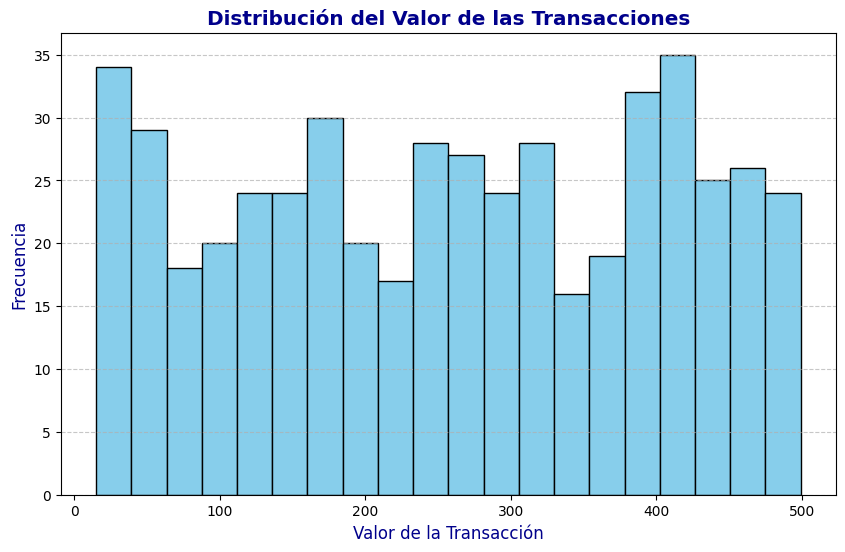

In [16]:
transactions_nd['amount'].plot.hist(figsize=(10, 6),
                                 bins=20, 
                                 color='skyblue', 
                                 edgecolor='black')
plt.title('Distribución del Valor de las Transacciones', size='x-large', fontweight='bold',color='darkblue')
plt.xlabel('Valor de la Transacción', size='large', color='darkblue')
plt.ylabel('Frecuencia', size='large', color='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Ejercicio 2**
Dos variables numéricas.

En el df products tengo 2 variables numericas: peso y precio. Selecciono un lmplot para ver de forma clara si existe una relacion entre estas 2 variables. 
En este caso, no están directamente relacionadas, hay mucha dispersión de los valores.

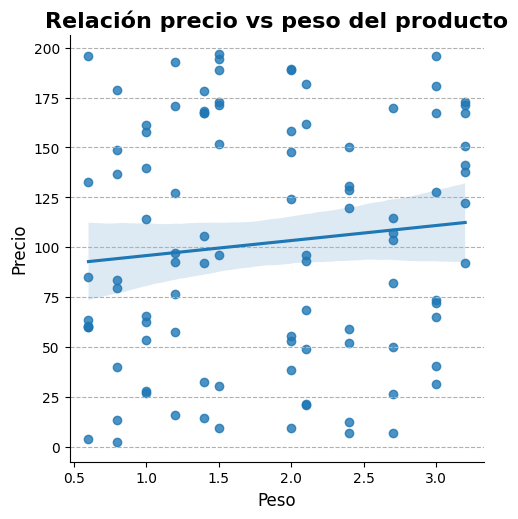

In [17]:
sns.lmplot(data=products, x="weight", y="price")
# Agregar título
plt.title('Relación precio vs peso del producto', fontsize=16, fontweight='bold')
plt.ylabel('Precio', fontsize=12)
plt.xlabel('Peso', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

De la tabla transactions, agrupo por codigo de usuario (user_id) las columnas id(con count, obtengo la cantidad de transacciones por usuario)
y amount(sumo el valor de las tranasacciones por usuario). Asi tenemos el conteo de las transacciones realizadas por un usuario y su monto 

In [18]:
transactions_user = transactions_nd.groupby('user_id').agg({
                                                        'id': 'count',
                                                        'amount': 'sum',
                                                        }).reset_index()

In [19]:
transactions_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  216 non-null    object 
 1   id       216 non-null    int64  
 2   amount   216 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


Elijo un lmplot para ver la relacion entre la cantidad de transacciones de los usuarios y su valor. 
En el gráfico podemos ver que si existe una relación entre estas 2 variables y que la mayoria de los usuarios realizan transacciones de menos de 5 unidades de producto y de bajo valor

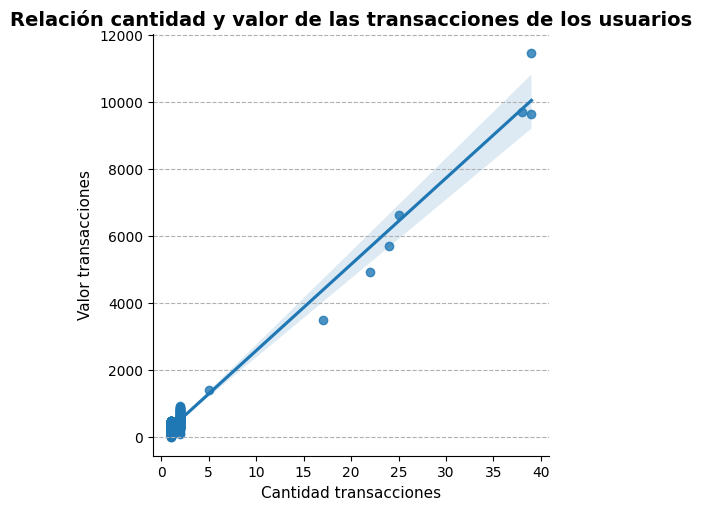

In [20]:
sns.lmplot(data=transactions_user, x="id", y="amount")
# Agregar título
plt.title('Relación cantidad y valor de las transacciones de los usuarios', fontsize=14, fontweight='bold')
plt.ylabel('Valor transacciones', fontsize=11)
plt.xlabel('Cantidad transacciones', fontsize=11)
plt.grid(axis='y', linestyle='--')
#plt.grid(axis='x', linestyle='')
plt.show()

**Ejercicio 3**
Una variable categórica.

Del df transactions elijo la columna declined que es una variable categorica. Voy a graficar en un pie o quesito el numero de transacciones declinadas vs las no declinadas

In [21]:
transactions['declined'].value_counts()

declined
0    500
1     87
Name: count, dtype: int64

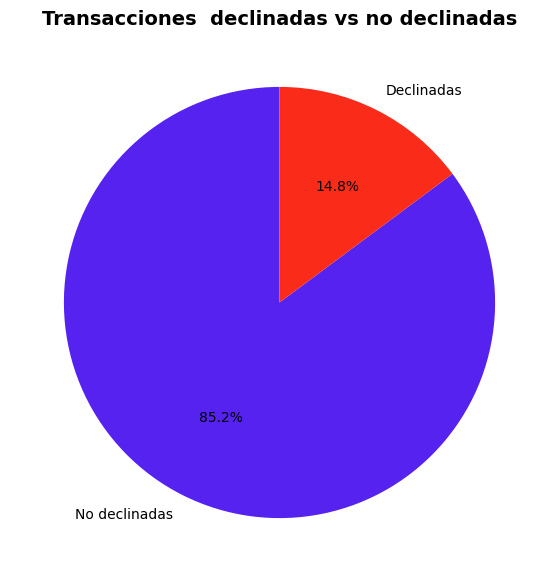

In [22]:
transactions['declined'].value_counts().plot.pie(
    labels=['No declinadas', 'Declinadas'],  # Etiquetas personalizadas
    autopct='%1.1f%%',  # Mostrar porcentajes
    colors=['#5622f0', '#fa2b19'],
    figsize=(7, 7),
    startangle = 90
    )

# Agregar título
plt.title('Transacciones  declinadas vs no declinadas', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

**Ejercicio 4**
Una variable categórica y una numérica.

De la tabla transactions, elijo la columna declined.  Voy a agrupar el df por declined (variable categorica) para obtener el monto (amount= variable numerica) de las transacciones declinadas y de las no declinadas. Elijo una grafico de barras en el que se pueden apreciar mejor los valores de las transacciones declinadas y no declinadas

In [23]:
transactions.groupby('declined')[('amount')].sum()

declined
0    129505.59
1     21198.16
Name: amount, dtype: float64

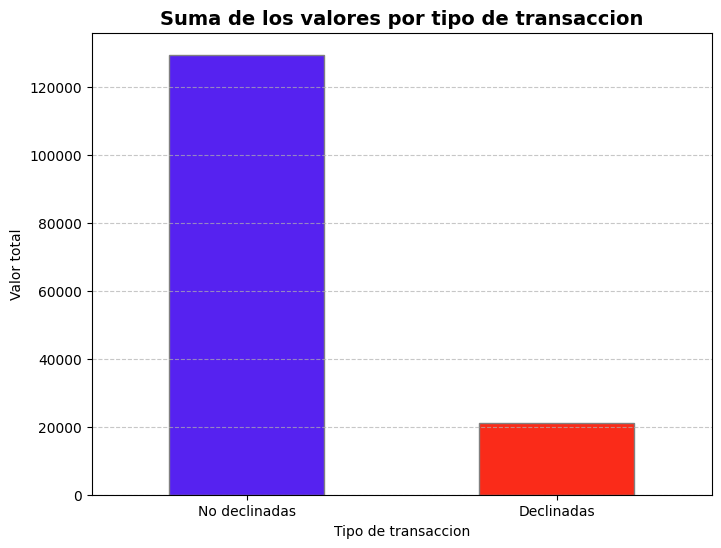

In [24]:
transactions.groupby('declined')[('amount')].sum().plot.bar(
    color=['#5622f0', '#fa2b19'],
    edgecolor='grey',
    figsize=(8, 6)
)
# Configurar etiquetas personalizadas
plt.xticks(ticks=[0, 1], labels=['No declinadas', 'Declinadas'], rotation=0)

plt.title('Suma de los valores por tipo de transaccion', fontsize=14, fontweight='bold')
plt.ylabel('Valor total')
plt.xlabel('Tipo de transaccion')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Ejercicio 5**
Dos variables categóricas.

Para 2 variables categoricas, he elegido representar la cantidad de usuarios que realizan transacciones por pais. Desde el dataframe users, agrupo por pais la columna de id. Obtengo asi el numero de usuarios por país. Lo represento con un grafico de barras, que me permite ver bien la variable categorica (country) y la variable categorica id (su conteo)

In [25]:
users.groupby('country')['id'].count()


country
Canada             75
United Kingdom     50
United States     150
Name: id, dtype: int64

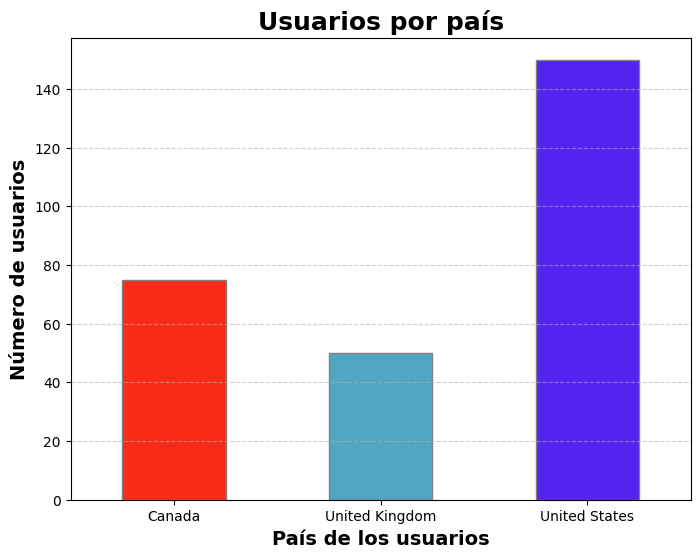

In [26]:
# dos variables categoricas : Conteo de usuarios por pais (users_country)
colors = ['#fa2b19','#51a7c2','#5622f0']
users.groupby('country')['id'].count().plot.bar(color=colors, 
                       edgecolor='grey', 
                       figsize=(8, 6))

# Rotar las etiquetas del eje x
plt.xticks(rotation=0)

# Agregar título
plt.title('Usuarios por país', fontsize=18, fontweight='bold')
plt.ylabel('Número de usuarios',fontsize=14, fontweight='bold')
plt.xlabel('País de los usuarios', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.grid(axis='x', linestyle='')  # Elimina las líneas verticales
plt.show()


**Ejercicio 6**
Tres variables.

In [27]:
print(products.info())
print(products_transaction.info())
print(transactions.info())
print(users.info())
print(companies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1457 non-null   object
 1   product_id      1457 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------    

Para este ejercicio, he debido fusionar algunos dataframes. Primero, he hecho un filtro de las columnas que me podian interesar de los dataframes transactions (trans_filter), companies (comp_filter) y users (users_filter). Luego he fusionado los dataframes trans_filter y users_filter. El resultado es transactions_mg1. Finalmente, fusiono transactions_mg1 con el filtro de companies (comp_filter) y obtengo transactions_mg2. 

In [28]:
trans_filter = transactions[['id','business_id','amount','declined','user_id','timestamp']]
users_filter = users[['id','country']]
comp_filter = companies[['company_id', 'company_name','country']]

print(trans_filter.info())
print(users_filter.info())
print(comp_filter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   business_id  587 non-null    object        
 2   amount       587 non-null    float64       
 3   declined     587 non-null    int64         
 4   user_id      587 non-null    object        
 5   timestamp    587 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       275 non-null    object
 1   country  275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      

In [29]:
transactions_mg1 = pd.merge(trans_filter, users_filter, left_on='user_id', right_on='id')
transactions_mg1['tr_year'] = transactions_mg1['timestamp'].dt.year

In [30]:
transactions_mg2 = pd.merge(transactions_mg1,comp_filter, left_on='business_id', right_on='company_id', how='inner')
transactions_mg2

,id_x,business_id,amount,declined,user_id,timestamp,id_y,country_x,tr_year,company_id,company_name,country_y
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,b-2362,466.92,0,92,2021-08-28 23:42:24,92,United States,2021,b-2362,Lorem Eu Incorporated,Canada
1,0466A42E-47CF-8D24-FD01-C0B689713128,b-2302,49.53,0,170,2021-07-26 07:29:18,170,United Kingdom,2021,b-2302,Nunc Interdum Incorporated,Germany
2,063FBA79-99EC-66FB-29F7-25726D1764A5,b-2250,92.61,0,275,2022-01-06 21:25:27,275,Canada,2022,b-2250,Amet Nulla Donec Corporation,Italy
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,b-2618,394.18,0,265,2022-01-26 02:07:14,265,Canada,2022,b-2618,Non Institute,United Kingdom
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,b-2346,279.93,0,92,2021-10-26 23:00:01,92,United States,2021,b-2346,Ut Semper Foundation,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,b-2390,78.29,0,272,2022-03-13 00:27:34,272,Canada,2022,b-2390,Neque Tellus Imperdiet Corp.,Ireland
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,b-2494,200.72,0,250,2022-03-16 02:35:05,250,Canada,2022,b-2494,Malesuada PC,Ireland
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,b-2302,42.32,0,223,2021-06-13 11:41:17,223,Canada,2021,b-2302,Nunc Interdum Incorporated,Germany
585,FE809ED4-2DB6-55AC-C915-929516E4646B,b-2302,219.83,0,185,2021-11-09 21:35:40,185,United Kingdom,2021,b-2302,Nunc Interdum Incorporated,Germany


In [31]:
transactions_mg2.rename(columns={'id_x':'transaction_id',
                                 'country_x':'country_user',
                                 'country_y': 'country_comp'}, inplace=True)
transactions_mg2 = transactions_mg2.drop(['id_y'], axis=1)
transactions_mg2 = transactions_mg2.drop(['business_id'], axis=1)

In [32]:
print(transactions_mg2.shape)
transactions_mg2

(587, 10)


,transaction_id,amount,declined,user_id,timestamp,country_user,tr_year,company_id,company_name,country_comp
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,466.92,0,92,2021-08-28 23:42:24,United States,2021,b-2362,Lorem Eu Incorporated,Canada
1,0466A42E-47CF-8D24-FD01-C0B689713128,49.53,0,170,2021-07-26 07:29:18,United Kingdom,2021,b-2302,Nunc Interdum Incorporated,Germany
2,063FBA79-99EC-66FB-29F7-25726D1764A5,92.61,0,275,2022-01-06 21:25:27,Canada,2022,b-2250,Amet Nulla Donec Corporation,Italy
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,394.18,0,265,2022-01-26 02:07:14,Canada,2022,b-2618,Non Institute,United Kingdom
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,279.93,0,92,2021-10-26 23:00:01,United States,2021,b-2346,Ut Semper Foundation,Sweden
...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,78.29,0,272,2022-03-13 00:27:34,Canada,2022,b-2390,Neque Tellus Imperdiet Corp.,Ireland
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,200.72,0,250,2022-03-16 02:35:05,Canada,2022,b-2494,Malesuada PC,Ireland
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,42.32,0,223,2021-06-13 11:41:17,Canada,2021,b-2302,Nunc Interdum Incorporated,Germany
585,FE809ED4-2DB6-55AC-C915-929516E4646B,219.83,0,185,2021-11-09 21:35:40,United Kingdom,2021,b-2302,Nunc Interdum Incorporated,Germany


Del dataframe transactions_mg2, selecciono unicamente las transacciones realizadas y pagadas (no declinadas = nd). 
El resultado es transactions_mg2_nd

In [33]:
transactions_mg2_nd = transactions_mg2[transactions_mg2['declined'] == 0]
print(transactions_mg2_nd.shape)
transactions_mg2_nd

(500, 10)


,transaction_id,amount,declined,user_id,timestamp,country_user,tr_year,company_id,company_name,country_comp
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,466.92,0,92,2021-08-28 23:42:24,United States,2021,b-2362,Lorem Eu Incorporated,Canada
1,0466A42E-47CF-8D24-FD01-C0B689713128,49.53,0,170,2021-07-26 07:29:18,United Kingdom,2021,b-2302,Nunc Interdum Incorporated,Germany
2,063FBA79-99EC-66FB-29F7-25726D1764A5,92.61,0,275,2022-01-06 21:25:27,Canada,2022,b-2250,Amet Nulla Donec Corporation,Italy
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,394.18,0,265,2022-01-26 02:07:14,Canada,2022,b-2618,Non Institute,United Kingdom
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,279.93,0,92,2021-10-26 23:00:01,United States,2021,b-2346,Ut Semper Foundation,Sweden
...,...,...,...,...,...,...,...,...,...,...
581,FCE2AB9A-271D-2BDC-9E49-8DD92A373391,335.56,0,152,2022-02-06 22:48:41,United Kingdom,2022,b-2302,Nunc Interdum Incorporated,Germany
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,78.29,0,272,2022-03-13 00:27:34,Canada,2022,b-2390,Neque Tellus Imperdiet Corp.,Ireland
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,200.72,0,250,2022-03-16 02:35:05,Canada,2022,b-2494,Malesuada PC,Ireland
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,42.32,0,223,2021-06-13 11:41:17,Canada,2021,b-2302,Nunc Interdum Incorporated,Germany


Para mas de 2 variables, hay varias opciones de graficos recomendados: scatterplot, lmplot, boxplot. Del df transactions_mg2_nd ( que considera sólo las transacciones no declinadas), quiero ver la distribucion del valor de las transacciones por cada pais y por año. 

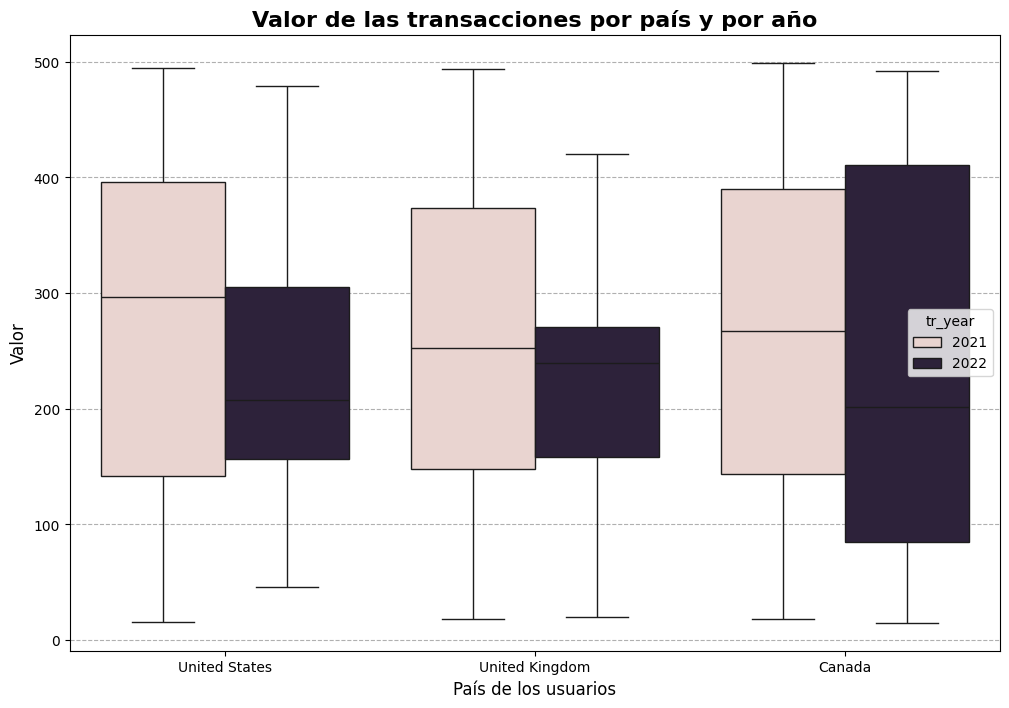

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x='country_user', y='amount', hue='tr_year',data=transactions_mg2_nd)

# Agregar título
plt.title('Valor de las transacciones por país y por año', fontsize=16, fontweight='bold')
plt.ylabel('Valor', fontsize=12)
plt.xlabel('País de los usuarios', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='')
plt.show()

Utilizando el mismo dataframe, transactions_mg2_nd,quiero ver la media de las transacciones por pais y por año. Esto lo puedo hacer mediante un catplot. 

<Figure size 1200x800 with 0 Axes>

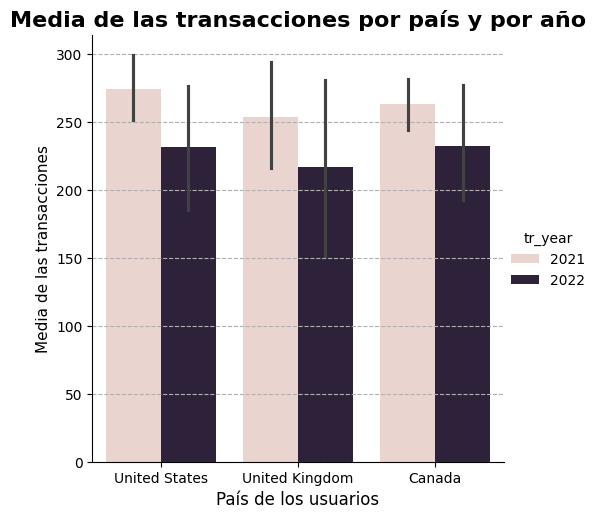

In [35]:
# La media de transacciones por pais y por año (con catplot)
plt.figure(figsize=(12,8))
sns.catplot(data=transactions_mg2_nd, x='country_user', y='amount', hue='tr_year', kind='bar')

# Agregar título
plt.title('Media de las transacciones por país y por año', fontsize=16, fontweight='bold')
plt.ylabel('Media de las transacciones', fontsize=11)
plt.xlabel('País de los usuarios', fontsize=12)
plt.grid(axis='y', linestyle='--')
#plt.grid(axis='x', linestyle='')
plt.show()

**Ejercicio 7**
Graficar un Pairplot.

Necesito variables numericas. El df products tiene 2 numericas y el df transactions tiene una variable numerica mas. Voy a fusionar primero los df products y products_transaction. El dataframe resultante es products_mg1. 
Después fusionaré products_mg1 con el df transactions_mg2. El resultado será products_mg2. el grafico de Pairplot me permitirá ver si las diferentes varibles numericas están relacionadas. 

In [36]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


In [37]:
products_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1457 non-null   object
 1   product_id      1457 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


In [38]:
products_mg1 = pd.merge(products_transaction, products,left_on='product_id', right_on='id')

In [39]:
# Fusionamos ambos dataframes.  Se incluyen transacciones declinadas y no declinadas
products_mg2 = pd.merge(products_mg1,transactions_mg2, on='transaction_id')
print(products_mg2.shape)
products_mg2.head()

(1457, 17)


,transaction_id,product_id,id,product_name,price,colour,weight,warehouse_id,amount,declined,user_id,timestamp,country_user,tr_year,company_id,company_name,country_comp
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,71,71,Tully Dorne,103.73,#424242,2.7,WH--66,466.92,0,92,2021-08-28 23:42:24,United States,2021,b-2362,Lorem Eu Incorporated,Canada
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,1,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4,466.92,0,92,2021-08-28 23:42:24,United States,2021,b-2362,Lorem Eu Incorporated,Canada
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,19,19,dooku solo,60.33,#3f3f3f,0.6,WH--14,466.92,0,92,2021-08-28 23:42:24,United States,2021,b-2362,Lorem Eu Incorporated,Canada
3,0466A42E-47CF-8D24-FD01-C0B689713128,47,47,Tully,82.15,#919191,2.7,WH--42,49.53,0,170,2021-07-26 07:29:18,United Kingdom,2021,b-2302,Nunc Interdum Incorporated,Germany
4,0466A42E-47CF-8D24-FD01-C0B689713128,97,97,jinn Winterfell,65.25,#bababa,1.0,WH--92,49.53,0,170,2021-07-26 07:29:18,United Kingdom,2021,b-2302,Nunc Interdum Incorporated,Germany


In [40]:
products_mg2_nd = products_mg2[products_mg2['declined'] == 0]
products_mg2_nd.shape

(1236, 17)

**Precio (price) y Monto (amount)**: Parece haber una correlación positiva débil. A medida que el precio aumenta, el monto también parece hacerlo, aunque hay una dispersión considerable.
**Precio (price) y Peso (weight)**: La relación parece débil o inexistente. Los puntos están bastante dispersos
**Monto (amount) y Peso (weight)**: la relación entre el monto y el peso parece débil o inexistente.
**Distribuciones individuales:**
El precio muestra picos alrededor de valores más bajos y más altos.
El monto parece tener una distribución con una mayor concentración en valores más altos.
El peso también muestra picos alrededor de valores más bajos y alrededor de 2.5.
**Diferencias por año (tr_year):** Al observar los colores, no se aprecian diferencias drásticas en las relaciones entre las variables para los años 2021 y 2022

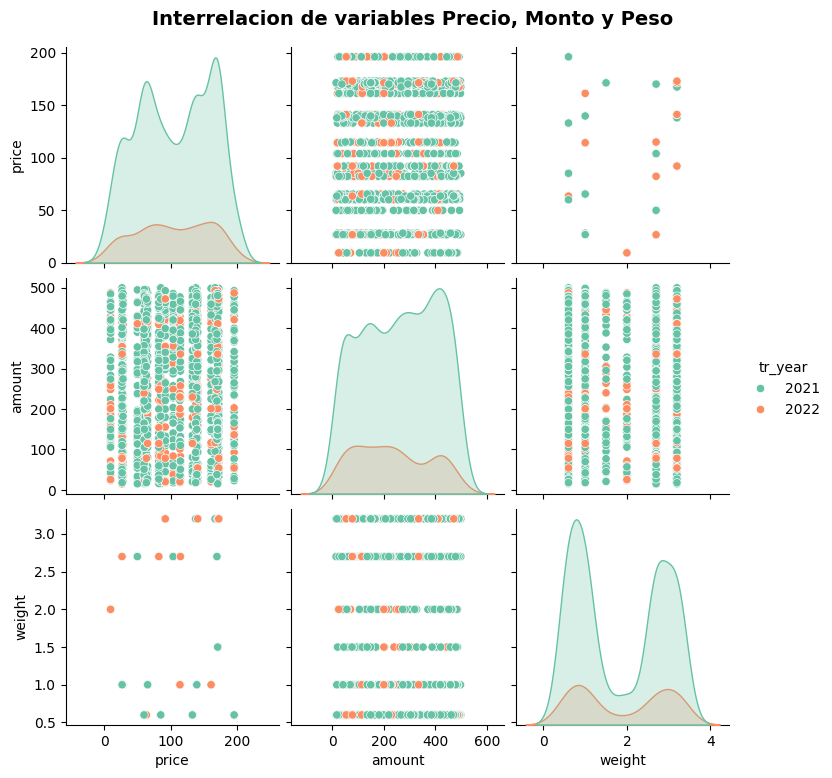

In [41]:
# dataframe con transacciones declinadas y no declinadas
sns.pairplot(products_mg2, vars=["price", "amount", "weight"], hue='tr_year', palette='Set2')
plt.suptitle("Interrelacion de variables Precio, Monto y Peso", fontsize=14, fontweight='bold', y=1.03)
plt.show()

**Nivel 2**

**Ejercicio 1**
Correlación de todas las variables numéricas.

In [42]:
# Correlacion considerando todas las transacciones, declinadas y no declinadas
products_mg2[['weight', 'price', 'amount']].corr()

,weight,price,amount
weight,1.000000,0.194816,-0.014904
price,0.194816,1.000000,0.011335
amount,-0.014904,0.011335,1.000000


In [43]:
# Correlacion considerando unicamente las transacciones no declinadas
products_mg2_nd[['weight', 'price', 'amount']].corr()

,weight,price,amount
weight,1.000000,0.207495,-0.022860
price,0.207495,1.000000,0.003035
amount,-0.022860,0.003035,1.000000


El heatmap me permite ver si las variables numericas están correlacionadas o no. En este caso, no lo están. 

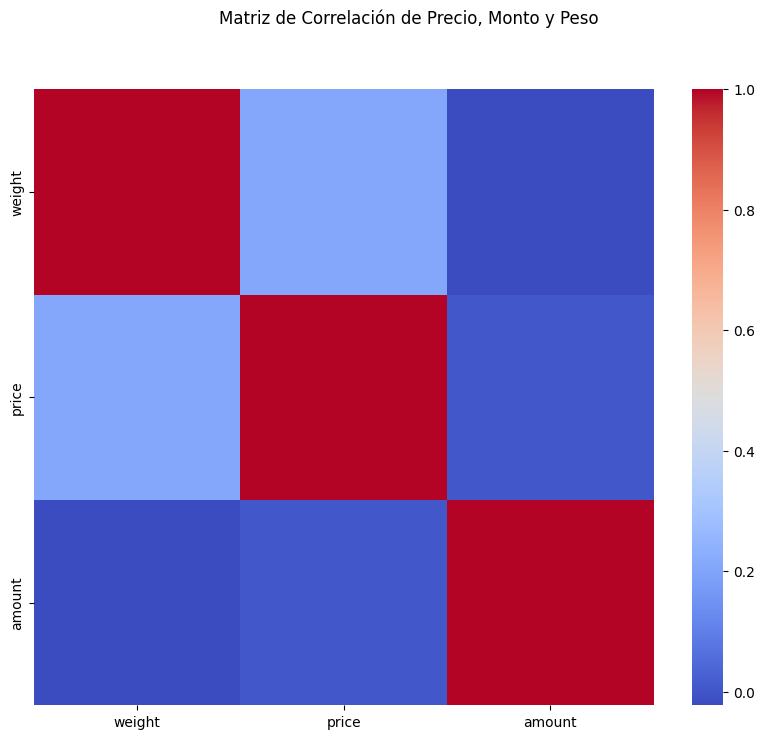

In [44]:
# Calcular la matriz de correlacion
corr_matrix = products_mg2_nd[['weight', 'price', 'amount']].corr()

# Crear el mapa de calor
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, cmap = 'coolwarm')
plt.suptitle("Matriz de Correlación de Precio, Monto y Peso")
plt.show()

**Ejercicio 2**
Implementa un jointplot.

En el grafico anterior, hemos visto que no hay mucha relacion entre price (precio del producto) y amount (valor de la transaccion). Voy a crear un nuevo dataframe para ver si existe relacion entre la cantidad de productos por transaccion y el valor de la transaccion.  
 Usaré un jointplot, que nos permite ver la relación entre ambas variables de forma más completa. 
Genero un nuevo dataframe products_mg3, agrupando products_mg2_nd (que contempla unicamente las transacciones no declinadas) por la columna transaction_id. 

In [45]:
products_mg3 = products_mg2_nd.groupby('transaction_id').agg({
    'product_id': 'count',
    'amount': 'first',
    'declined': 'first',
    'user_id': 'first',
    'country_user': 'first',
    'tr_year': 'first',
}).reset_index()
products_mg3

,transaction_id,product_id,amount,declined,user_id,country_user,tr_year
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,3,466.92,0,92,United States,2021
1,0466A42E-47CF-8D24-FD01-C0B689713128,3,49.53,0,170,United Kingdom,2021
2,063FBA79-99EC-66FB-29F7-25726D1764A5,4,92.61,0,275,Canada,2022
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,3,394.18,0,265,Canada,2022
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,2,279.93,0,92,United States,2021
...,...,...,...,...,...,...,...
495,FCE2AB9A-271D-2BDC-9E49-8DD92A373391,4,335.56,0,152,United Kingdom,2022
496,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,4,78.29,0,272,Canada,2022
497,FD89D51B-AE8D-77DC-E450-B8083FBD3187,4,200.72,0,250,Canada,2022
498,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,1,42.32,0,223,Canada,2021


In [46]:
products_mg3 = products_mg3.rename(columns={'product_id': 'prod_quantity'})
products_mg3

,transaction_id,prod_quantity,amount,declined,user_id,country_user,tr_year
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,3,466.92,0,92,United States,2021
1,0466A42E-47CF-8D24-FD01-C0B689713128,3,49.53,0,170,United Kingdom,2021
2,063FBA79-99EC-66FB-29F7-25726D1764A5,4,92.61,0,275,Canada,2022
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,3,394.18,0,265,Canada,2022
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,2,279.93,0,92,United States,2021
...,...,...,...,...,...,...,...
495,FCE2AB9A-271D-2BDC-9E49-8DD92A373391,4,335.56,0,152,United Kingdom,2022
496,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,4,78.29,0,272,Canada,2022
497,FD89D51B-AE8D-77DC-E450-B8083FBD3187,4,200.72,0,250,Canada,2022
498,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,1,42.32,0,223,Canada,2021


**Concentración de Pedidos**: Los hexágonos más oscuros indican áreas donde se concentra la mayor cantidad de pedidos. Se observa una alta concentración de pedidos con 1 o 2 productos y valores que se distribuyen en un rango medio-alto (aproximadamente entre 200 y 500). También se ve una concentración notable con 3 productos y valores igualmente distribuidos.
**Relación General**: Se observa que hay pedidos con cantidades variables de productos en diferentes rangos de valor. No parece haber una correlación lineal fuerte. 
**Distribuciones**: La mayoría de los pedidos tienen entre 1 y 3 productos, y el valor de los pedidos tiene una distribución relativamente amplia con algunos picos.
**Valores menos frecuentes**: Los hexágonos más claros representan combinaciones de cantidad de productos y valor del pedido que son menos comunes. Se pueden observar algunos pedidos con 4 productos, aunque son menos frecuentes que los de 1, 2 o 3 productos.

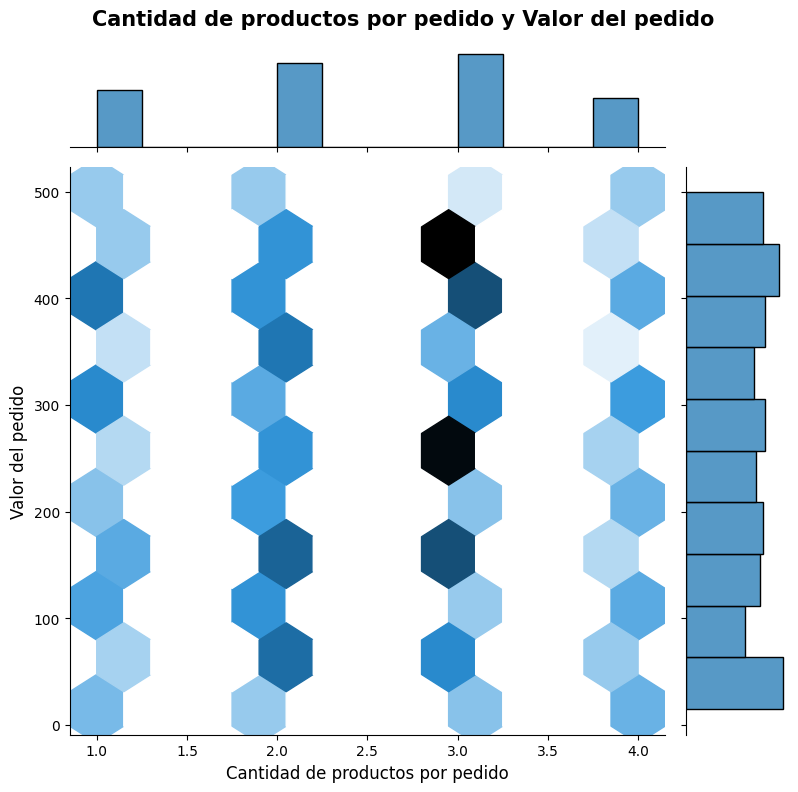

In [47]:
# Relación entre numero de productos por pedido y su amount
sns.jointplot(x="prod_quantity", y="amount", data=products_mg3, kind="hex", height=8)
plt.subplots_adjust(top=0.93)  # Así ajustamos el espacio superior y evitamos que el título se monte
plt.suptitle("Cantidad de productos por pedido y Valor del pedido", fontsize=15, fontweight='bold')
plt.xlabel("Cantidad de productos por pedido", fontsize=12)
plt.ylabel("Valor del pedido", fontsize=12)
plt.show()


**Nivel 3**

**Ejercicio 1**
Implementa un violinplot combinado con otro tipo de gráfico.

**Forma del Violín:** Un violín más ancho en una determinada área del eje y indica una mayor concentración de datos en ese rango de valores de transacción.
**sns.swarmplot:** Cada punto verde representa una transacción individual. Esto te permite ver la dispersión real de los datos y cómo se agrupan, complementando la vista de la distribución que ofrece el violinplot.

**Estados Unidos**: En 2021, la distribución del valor de las transacciones parece tener una mayor concentración alrededor de valores más bajos, con una dispersión importante hacia valores más altos. En 2022, la distribución parece haberse desplazado ligeramente hacia valores más altos y muestra una dispersión similar.

**Reino Unido**: En 2021, la distribución parece ser más estrecha y centrada en un rango de valores intermedios. En 2022, la distribución se ha ensanchado y parece tener una mayor presencia de transacciones tanto de menor como de mayor valor.

**Canadá**: En ambos años, la distribución del valor de las transacciones parece ser bastante similar, con una concentración notable en el rango intermedio de valores y una dispersión hacia valores más altos.

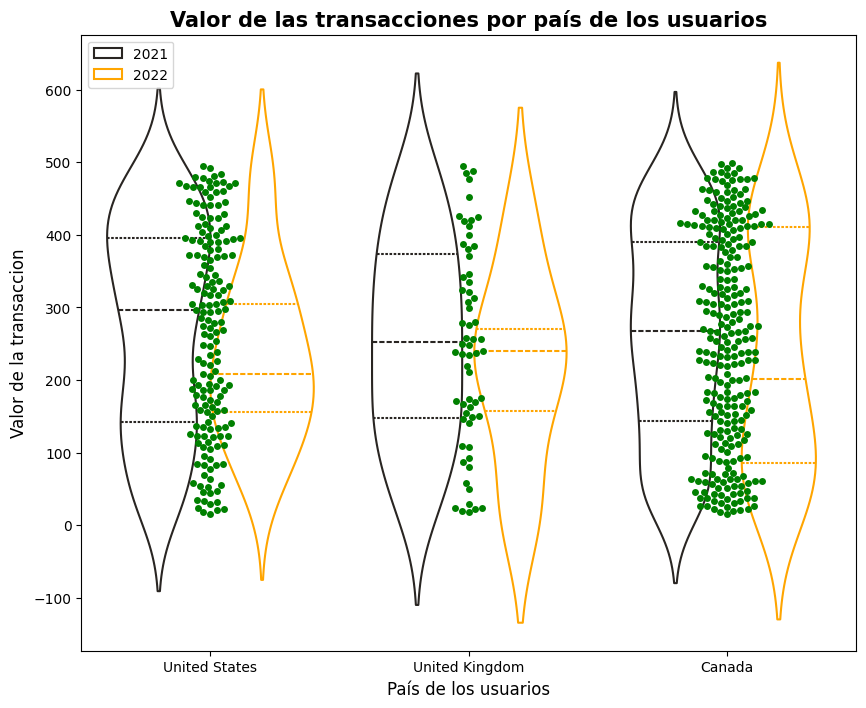

In [48]:
plt.figure(figsize=(10,8))
sns.violinplot(data=products_mg3, x="country_user", y="amount", hue="tr_year", inner='quart',color="orange",fill=False)
#plt.ylim(0, None)  # Establece el límite inferior del eje y en 0
sns.swarmplot(data=products_mg3, x="country_user", y="amount", color="green")
plt.title("Valor de las transacciones por país de los usuarios", fontsize=15, fontweight="bold")
plt.xlabel("País de los usuarios", fontsize=12)
plt.ylabel("Valor de la transaccion", fontsize=12)
plt.show() 


**Ejercicio 2**
Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

**Facetgrid - barplot**: La altura de cada barra representa el valor promedio del monto de la transaccion (Amount per transaction) para cada combinación de cantidad de productos por transacción (Product quantity per transaction), país y año.

Las líneas verticales (bigotes) representa el intervalo de confianza de la media (seaborn, por defecto, lo ubica en un 95%). Si los bigotes son más cortos indica que nuestra estimación de la media es más precisa (hay más datos o menor variabilidad). Si son más largos, la estimación de la media es menos precisa (debido a que hay menos datos o mayor dispersión de los datos o valores atípicos) 

**Media del monto por cantidad de productos:** Dentro de cada panel, se puede ver cómo el monto promedio de la transacción se relaciona con la cantidad de productos. El monto promedio de la transacción tiende a aumentar con el numero de productos, pero no es un aumento constante o lineal. 

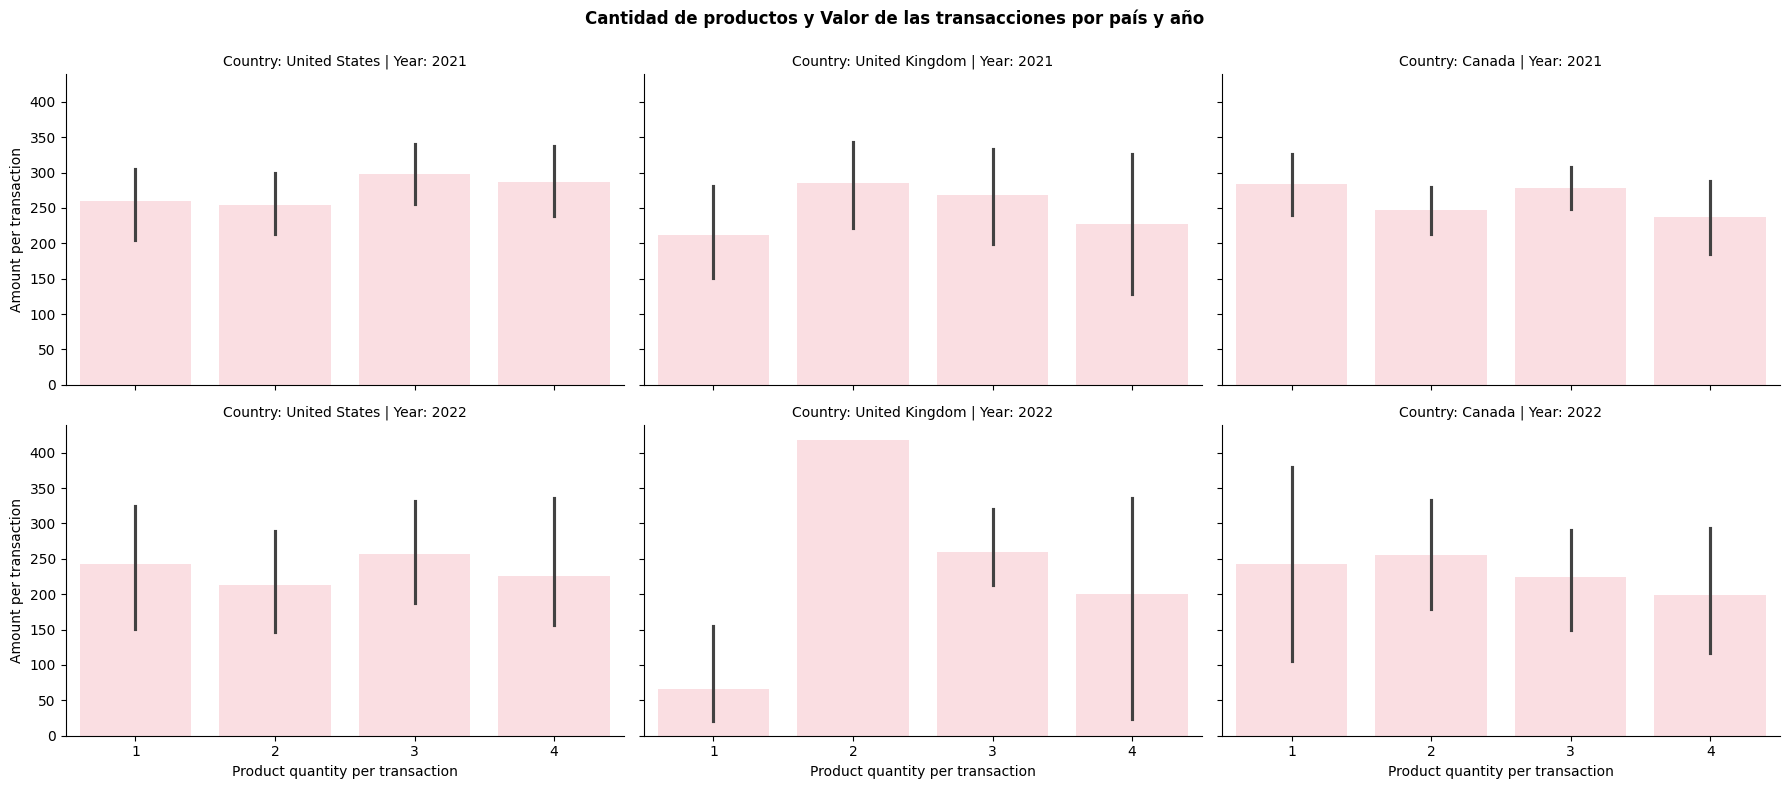

In [49]:
# Crear un FacetGrid con filas y columnas
g = sns.FacetGrid(products_mg3, col="country_user", row="tr_year", height=4, aspect=1.5)

# Graficar de cantidad de productos x pedido y valor del pedido
g.map(sns.barplot, "prod_quantity", "amount", color="pink", alpha= 0.6)

# Títulos y etiquetas
g.set_titles("Country: {col_name} | Year: {row_name}")
g.set_axis_labels("Product quantity per transaction", "Amount per transaction")
g.tight_layout()
plt.suptitle("Cantidad de productos y Valor de las transacciones por país y año", fontweight= 'bold')
plt.subplots_adjust(top=0.9)
plt.show()

**Facetgrid - boxplot**

**Mediana del monto de la transacción:** La línea horizontal dentro de cada caja representa la mediana del "Amount per transaction" para esa combinación específica de "Product quantity per transaction", país y año. 

**Rango Intercuartílico (RIQ):** La caja misma abarca el Rango Intercuartílico (del primer cuartil Q1 al tercer cuartil Q3). Esto significa que el 50% de las transacciones para esa categoría caen dentro de esa caja. Una caja más estrecha indica que la mayoría de los montos de transacción están más agrupados, mientras que una caja más ancha sugiere una mayor variabilidad.

**Dispersión y "bigotes" (whiskers):** Las líneas que se extienden desde la caja (los "bigotes") muestran el rango de datos que no son considerados valores atípicos. Esto nos da una idea de la dispersión de los datos más allá del 50% central.

**Valores atípicos (outliers):** Los puntos individuales fuera de los "bigotes" representan valores atípicos. 

**Canadá (2021 y 2022):** Parece que, a medida que la cantidad de productos por transacción aumenta (de 1 a 4), la mediana del monto de la transacción también tiende a aumentar, pero no podemos decir que es una relación lineal. Se observa una dispersión importante en los montos para cada cantidad de producto.

**Reino Unido (2021):** Para 1 y 2 productos, los rangos de monto son bastante similares. Para 3 productos, la mediana parece ser más alta. Y, para 4 productos, aunque la mediana es más baja, hay un rango amplio de montos.

**Diferencias entre EE. UU. y Reino Unido (2022):** En Estados Unidos, para 1 producto, el rango de montos es amplio. En Reino Unido, para 1 producto, el rango es muy pequeño y con montos bajos. Esto podría indicar diferentes patrones de compra o precios en estos países.

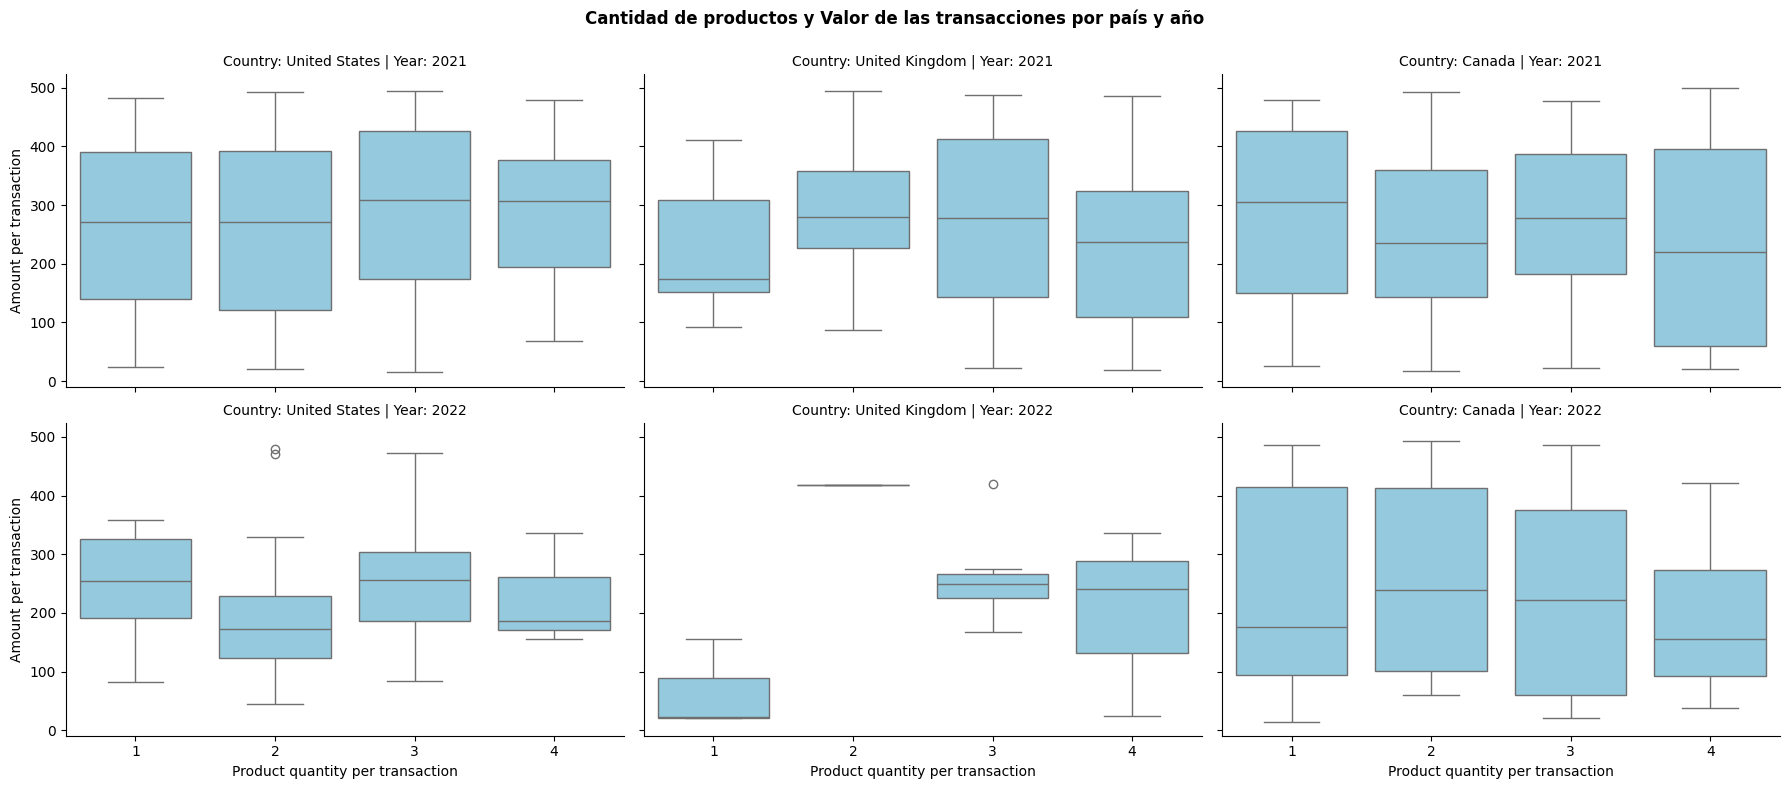

In [50]:
# Crear un FacetGrid con filas y columnas
g = sns.FacetGrid(products_mg3, col="country_user", row="tr_year", height=4, aspect=1.5)

# Graficar diagramas de dispersión (cantidad de productos x pedido y valor del pedido)
g.map(sns.boxplot, "prod_quantity", "amount", color="skyblue")

# Títulos y etiquetas
g.set_titles("Country: {col_name} | Year: {row_name}")
g.set_axis_labels("Product quantity per transaction", "Amount per transaction")
g.tight_layout()
plt.suptitle("Cantidad de productos y Valor de las transacciones por país y año", fontweight= 'bold')
plt.subplots_adjust(top=0.9)
plt.show()